In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)




Using Colab cache for faster access to the 'heart-disease-data' dataset.
Path to dataset files: /kaggle/input/heart-disease-data


In [ ]:
csv_path = os.path.join(path, "heart_disease_uci.csv")
df = pd.read_csv(csv_path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# `# ***EDA***`

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.shape

(920, 16)

In [ ]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

<Axes: >

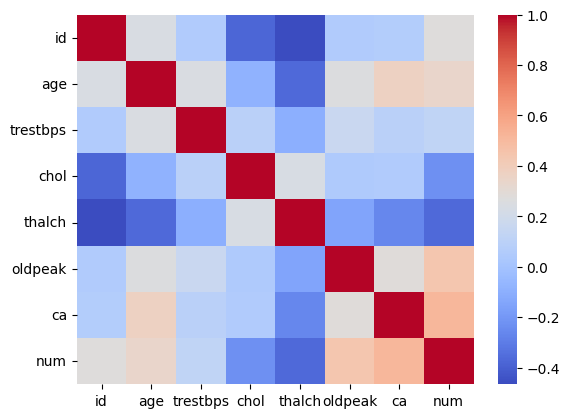

In [ ]:
sns.heatmap(df[num_cols].corr(), cmap="coolwarm"

)

## `## *HISTOGRAM*`

In [ ]:
# Zero_rate

zero_rate = (df[num_cols]).mean()
print(zero_rate)

id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64


In [ ]:
# Skewness
skewness = (df[num_cols]).skew()
print(skewness)

id          0.000000
age        -0.195994
trestbps    0.213334
chol       -0.613836
thalch     -0.211119
oldpeak     1.041427
ca          1.165978
num         0.968880
dtype: float64


In [ ]:
# kurt
kurt = (df[num_cols]).kurt()
print(kurt)

id         -1.200000
age        -0.382930
trestbps    2.958664
chol        0.062273
thalch     -0.479725
oldpeak     1.127069
ca          0.199498
num        -0.104325
dtype: float64


In [ ]:
# var_small
var_small = (df[num_cols]).var(ddof=1)<1e-6
print(var_small)

id          False
age         False
trestbps    False
chol        False
thalch      False
oldpeak     False
ca          False
num         False
dtype: bool


### *filtering to hist and violin*

In [ ]:
df_EDA = pd.DataFrame({
    "zero_rate" : zero_rate,
    "skewness" : skewness,
    "kurtosis": kurt,
    "var_small": var_small
})


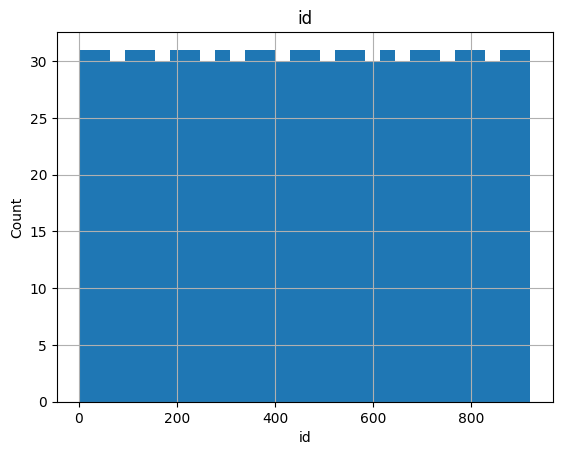

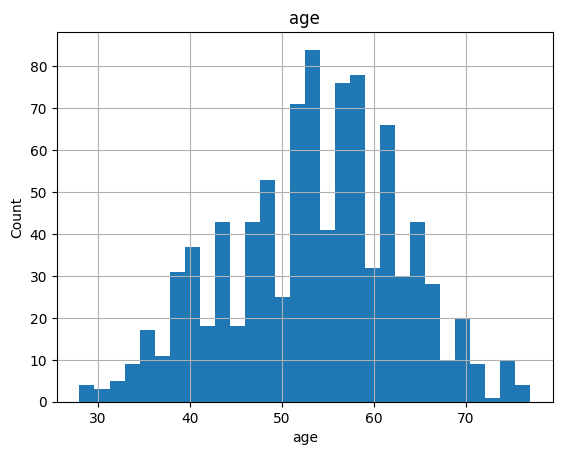

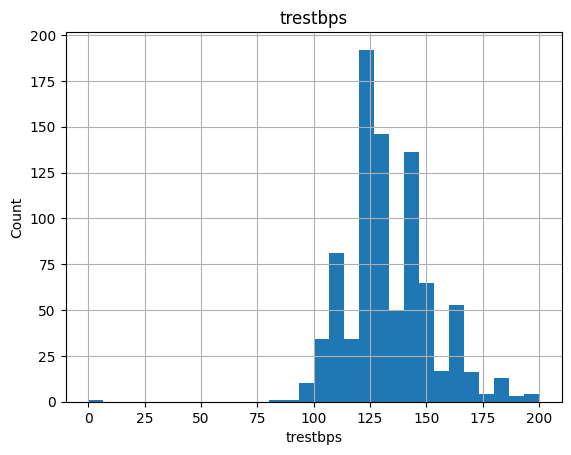

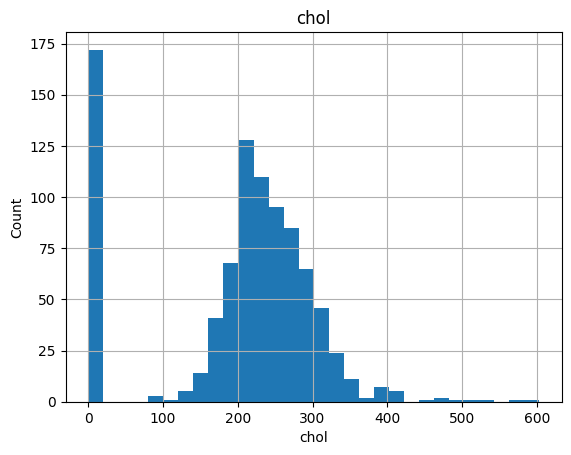

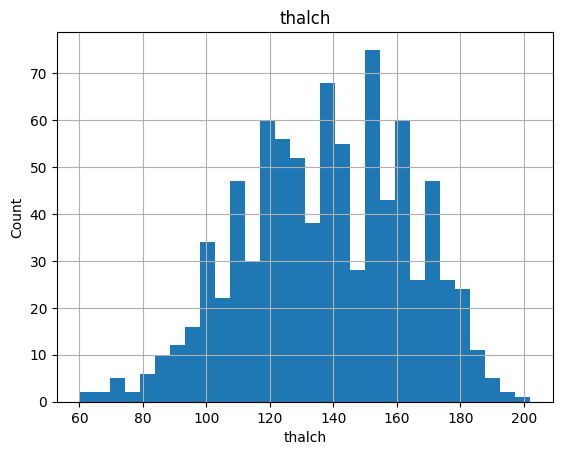

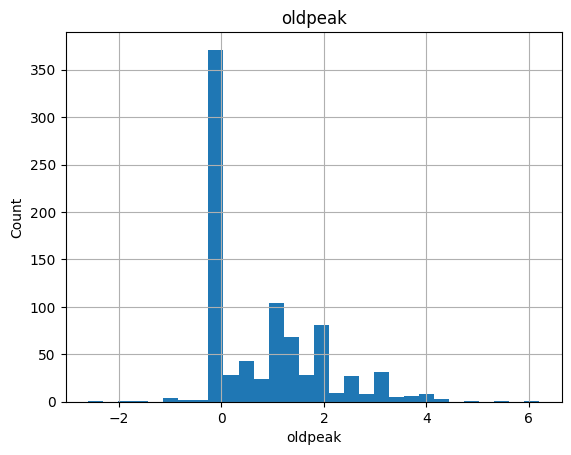

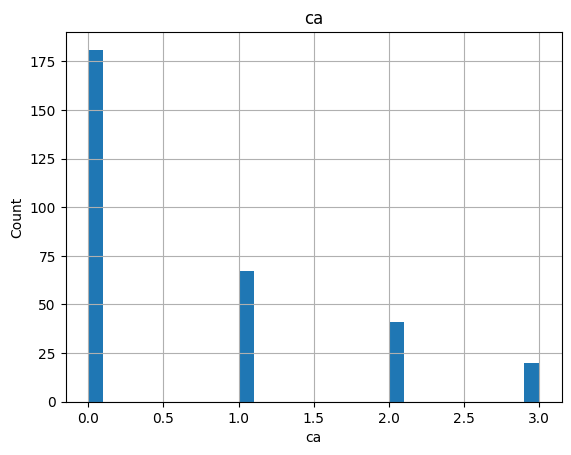

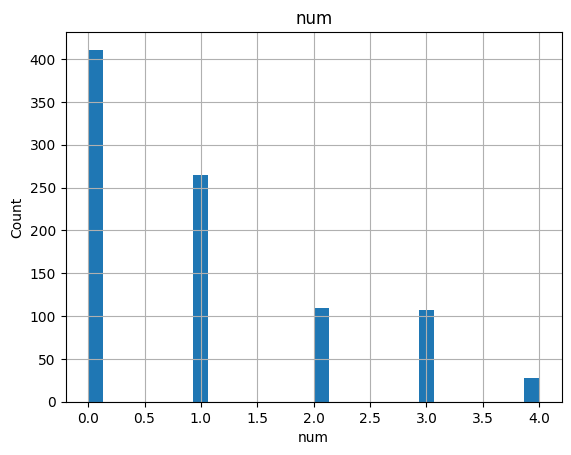

In [ ]:

for col in df[num_cols]:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

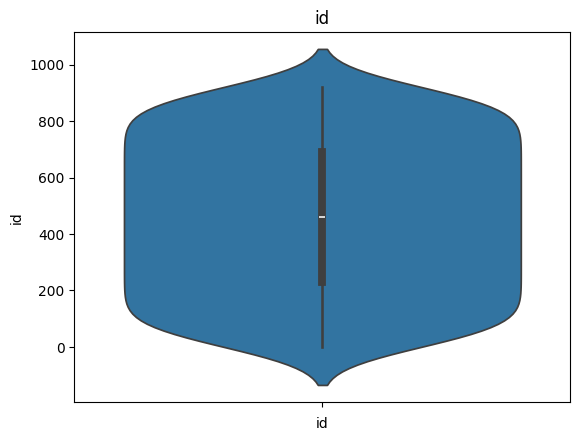

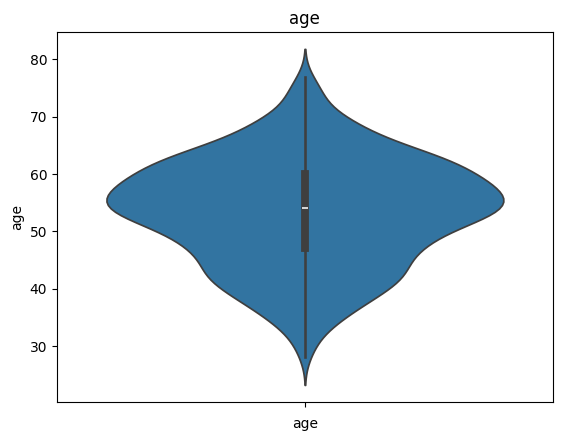

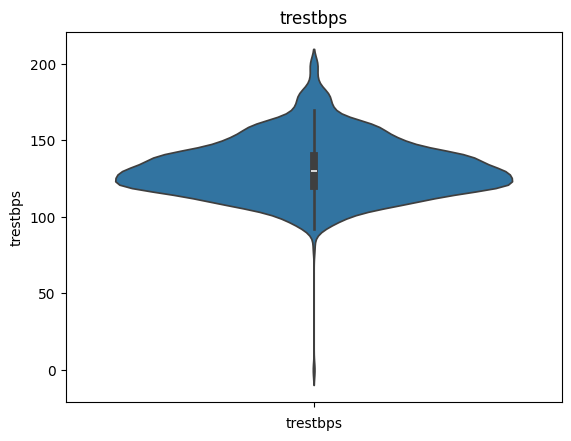

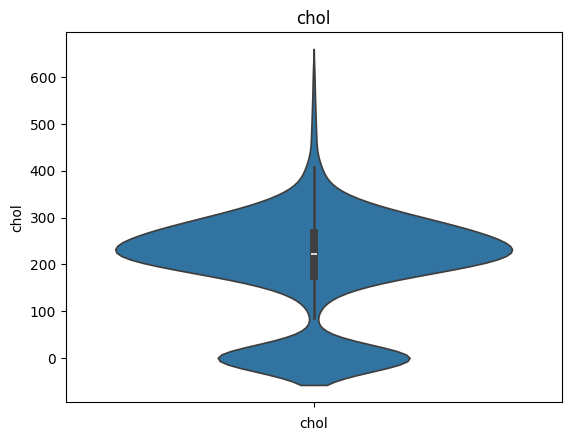

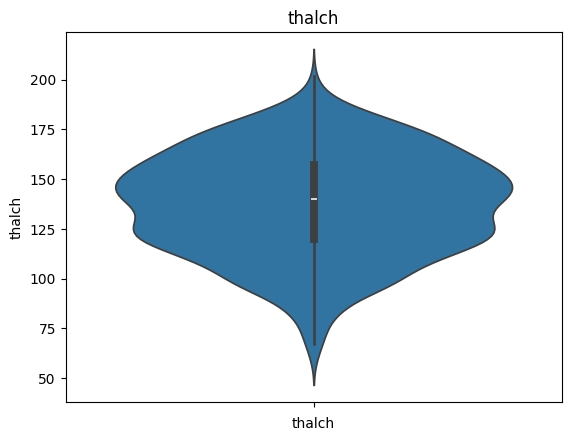

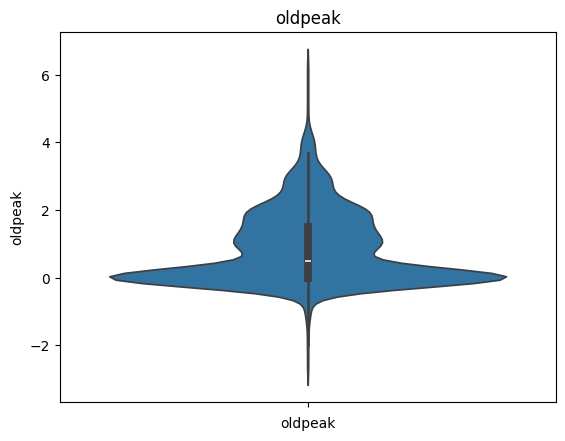

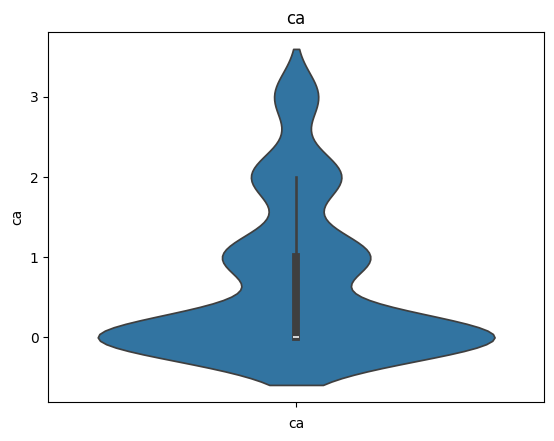

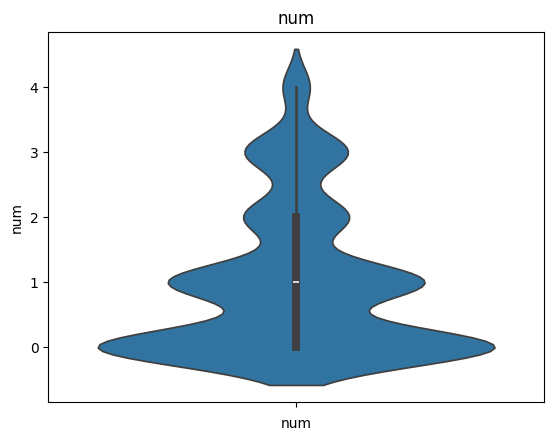

In [ ]:
for cols in df[num_cols]:
  plt.figure()
  sns.violinplot(data=df[cols])
  plt.title(cols)
  plt.xlabel(cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# ` ***PREPROCESSING***`

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)



cat_cols = ['fbs','restecg','exang','slope','thal']

for cols in cat_cols:
  #fillna by the most popular value
  mode_value = df[cols].mode()[0]
  df[cols].fillna(mode_value, inplace=True)


print(df.isna().sum())



id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-2461859529.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cols].fillna(mode_value, inplace=True)
/tmp/ipython-input-2461859529.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols].fillna(mode_value, inplace=True)


## `*** Encode***`



### Nordinal Categorical
1.   sex





1.   fbs

1.  restecg

1.   exang
2.   thal


2.   cp




### Ordinal Categorical





1.   slope
2.   ca










In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


ordinal_cols = ['slope','ca']
nordinal_cols = ['sex','cp','fbs','restecg','exang']


preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols),
        ('ord', OrdinalEncoder(), ordinal_cols),
        ('nord', OrdinalEncoder(), nordinal_cols)
    ]
)


transformered_df = preprocessor.fit_transform(df)

df_trans = pd.DataFrame(transformered_df)

In [ ]:
print(df_trans.head())

         0         1         2         3         4         5         6   \
0 -1.730169  1.007386  0.698041  0.311021  0.495698  1.349421 -1.249371   
1 -1.726404  1.432034  1.511761  0.797713 -1.175955  0.589832  4.292099   
2 -1.722639  1.432034 -0.658158  0.274289 -0.340128  1.634267  2.444942   
3 -1.718873 -1.752828 -0.115679  0.467130  1.968345  2.488805 -1.249371   
4 -1.715108 -1.328180 -0.115679  0.044717  1.371326  0.494884 -1.249371   

         7    8    9    10   11   12   13   14  
0 -0.871794  0.0  0.0  1.0  3.0  1.0  0.0  0.0  
1  0.879408  1.0  4.0  1.0  0.0  0.0  0.0  1.0  
2  0.003807  1.0  3.0  1.0  0.0  0.0  0.0  1.0  
3 -0.871794  0.0  0.0  1.0  2.0  0.0  1.0  0.0  
4 -0.871794  2.0  0.0  0.0  1.0  0.0  0.0  0.0  


# `*** FOR TENSORFLOW MODELING***`




## `*** Tensor_Tensorflow***`

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
X = df_trans.values
y = df['num'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## `*** Define Model***`

In [ ]:
# Build the model
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),  # Input layer with ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with ReLU activation
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Suitable for binary classification
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1846 - loss: 1.7063 - val_accuracy: 0.5815 - val_loss: 1.2837
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6206 - loss: 1.1988 - val_accuracy: 0.5815 - val_loss: 0.9900
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6239 - loss: 0.9539 - val_accuracy: 0.6141 - val_loss: 0.8313
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7138 - loss: 0.7541 - val_accuracy: 0.7283 - val_loss: 0.7023
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7524 - loss: 0.6288 - val_accuracy: 0.7663 - val_loss: 0.6103
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8066 - loss: 0.5294 - val_accuracy: 0.7989 - val_loss: 0.5371
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8547 - loss: 0.4637 - val_accuracy: 0.8315 - val_loss: 0.4689
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8684 - loss: 0.3974 - val_accuracy: 0.8750 - val_loss

## `*** Evaluate (calculating loss, gradient ) ***`

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9418 - loss: 0.3095 
Test Loss: 0.3043, Test Accuracy: 0.9348


In [ ]:
predictions = model.predict(X_test)

predicted_classes = (predictions > 0.5).astype("int32")

print(predicted_classes[:10])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]
